<a href="https://colab.research.google.com/github/DelRosal/DelRosal/blob/main/Different_Models_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This code was made as an exercise from the Tensorflow Natural Language Processing Course and TensorFlow AI Developer Profesional Certification**

In [ ]:
#LIBRARIES
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#DOWNLOAD AND PREPARE DATASET

imdb, info= tfds.load("imdb_reviews", with_info=True, as_supervised=True)

train_data, test_data= imdb["train"], imdb["test"]

#Training
train_sentences=[]
train_labels=[]

for sen, lab in train_data:
  train_sentences.append(sen.numpy().decode("utf8"))
  train_labels.append(lab.numpy())

#Testing
test_sentences=[]
test_labels=[]

for sen, lab in test_data:
  test_sentences.append(sen.numpy().decode("utf8"))
  test_labels.append(lab.numpy())

train_labels_final=np.array(train_labels)
test_labels_final=np.array(test_labels)

In [ ]:
#TOKENIZER AND PADDING 

#Parameters
vocab_size=10000
max_length=120
trunc="post"
oov_token="<OOV>"

#Tokenizer
tokenizer=Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)

word_index=tokenizer.word_index

#Padding
train_sequences=tokenizer.texts_to_sequences(train_sentences)
padded=pad_sequences(train_sequences, maxlen=max_length, truncating=trunc)

test_sequences=tokenizer.texts_to_sequences(test_sentences)
test_padded=pad_sequences(test_sequences, maxlen=max_length, truncating=trunc)


In [ ]:
#PLOT FUNCTION

def create_plot(history, sub):
  plt.plot(history.history[sub])
  plt.plot(history.history["val_"+sub])

  plt.xlabel("Epochs")
  plt.ylabel(sub)

  plt.legend([sub, "val_"+sub])
  plt.show()

FLATTEN MODEL

In [ ]:
#PARAMETERS
embedding=16

model_flatten=tf.keras.Sequential([
                           tf.keras.layers.Embedding(vocab_size,embedding,input_length=max_length),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(6, activation="relu"),
                           tf.keras.layers.Dense(1, activation="sigmoid")])

model_flatten.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

model_flatten.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 flatten_1 (Flatten)         (None, 1920)              0         
                                                                 
 dense_2 (Dense)             (None, 6)                 11526     
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_flatten=model_flatten.fit(padded,train_labels_final, batch_size= 128, epochs=10, validation_data=(test_padded,test_labels_final))

Epoch 1/10
196/196 [==============================] - 3s 12ms/step - loss: 0.6322 - accuracy: 0.6441 - val_loss: 0.4435 - val_accuracy: 0.8062
Epoch 2/10
196/196 [==============================] - 2s 11ms/step - loss: 0.3323 - accuracy: 0.8624 - val_loss: 0.3706 - val_accuracy: 0.8354
Epoch 3/10
196/196 [==============================] - 2s 11ms/step - loss: 0.2193 - accuracy: 0.9190 - val_loss: 0.3964 - val_accuracy: 0.8254
Epoch 4/10
196/196 [==============================] - 2s 11ms/step - loss: 0.1388 - accuracy: 0.9588 - val_loss: 0.4335 - val_accuracy: 0.8211
Epoch 5/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0742 - accuracy: 0.9855 - val_loss: 0.4966 - val_accuracy: 0.8141
Epoch 6/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0353 - accuracy: 0.9964 - val_loss: 0.5470 - val_accuracy: 0.8134
Epoch 7/10
196/196 [==============================] - 2s 10ms/step - loss: 0.0174 - accuracy: 0.9988 - val_loss: 0.5910 - val_accuracy: 0.8119

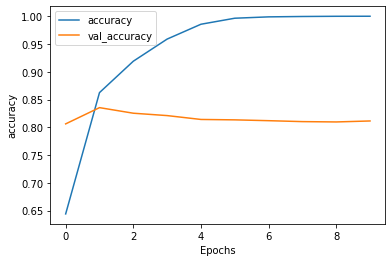

In [ ]:
create_plot(history_flatten, "accuracy")

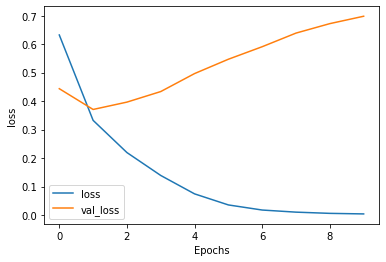

In [ ]:
create_plot(history_flatten,"loss")

LSTM MODEL

In [ ]:
#PARAMETERS
embedding2=16
lstm=32

model_lstm=tf.keras.Sequential([
                                tf.keras.layers.Embedding(vocab_size, embedding2, input_length=max_length),
                                tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm)),
                                tf.keras.layers.Dense(6, activation="relu"),
                                tf.keras.layers.Dense(1, activation="sigmoid")])

model_lstm.compile(loss="binary_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 64)               12544     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172,941
Trainable params: 172,941
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_lstm=model_lstm.fit(padded,train_labels_final, batch_size=128, epochs=10, validation_data=(test_padded,test_labels_final))

Epoch 1/10
196/196 [==============================] - 38s 171ms/step - loss: 0.5497 - accuracy: 0.6995 - val_loss: 0.4128 - val_accuracy: 0.8209
Epoch 2/10
196/196 [==============================] - 33s 167ms/step - loss: 0.3147 - accuracy: 0.8733 - val_loss: 0.3891 - val_accuracy: 0.8294
Epoch 3/10
196/196 [==============================] - 34s 172ms/step - loss: 0.2528 - accuracy: 0.9024 - val_loss: 0.4268 - val_accuracy: 0.8107
Epoch 4/10
196/196 [==============================] - 33s 169ms/step - loss: 0.2132 - accuracy: 0.9209 - val_loss: 0.4441 - val_accuracy: 0.8180
Epoch 5/10
196/196 [==============================] - 33s 170ms/step - loss: 0.1856 - accuracy: 0.9358 - val_loss: 0.4700 - val_accuracy: 0.8150
Epoch 6/10
196/196 [==============================] - 33s 170ms/step - loss: 0.1639 - accuracy: 0.9458 - val_loss: 0.5269 - val_accuracy: 0.8063
Epoch 7/10
196/196 [==============================] - 34s 174ms/step - loss: 0.1411 - accuracy: 0.9540 - val_loss: 0.6414 - val_ac

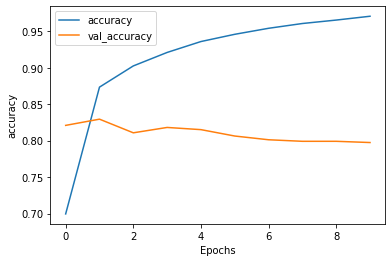

In [ ]:
create_plot(history_lstm,"accuracy")

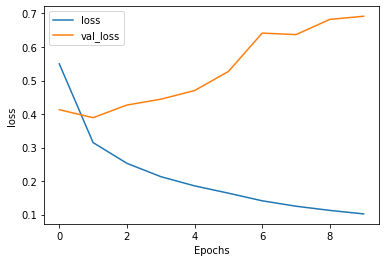

In [ ]:
create_plot(history_lstm,"loss")

GRU MODEL

In [ ]:
#PARAMETERS
embedding3=16
gru=32

model_gru=tf.keras.Sequential([
                               tf.keras.layers.Embedding(vocab_size, embedding3, input_length=max_length),
                               tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru)),
                               tf.keras.layers.Dense(6, activation="relu"),
                               tf.keras.layers.Dense(1, activation="sigmoid")])

model_gru.compile(loss="binary_crossentropy",
                  optimizer="adam",
                  metrics=["accuracy"])

model_gru.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               9600      
 nal)                                                            
                                                                 
 dense_6 (Dense)             (None, 6)                 390       
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169,997
Trainable params: 169,997
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_gru=model_gru.fit(padded,train_labels_final, batch_size=128, epochs=10, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 38s 168ms/step - loss: 0.5981 - accuracy: 0.6389 - val_loss: 0.4258 - val_accuracy: 0.8050
Epoch 2/10
196/196 [==============================] - 32s 164ms/step - loss: 0.3216 - accuracy: 0.8666 - val_loss: 0.3891 - val_accuracy: 0.8286
Epoch 3/10
196/196 [==============================] - 31s 160ms/step - loss: 0.2365 - accuracy: 0.9105 - val_loss: 0.4102 - val_accuracy: 0.8193
Epoch 4/10
196/196 [==============================] - 31s 161ms/step - loss: 0.1901 - accuracy: 0.9311 - val_loss: 0.4613 - val_accuracy: 0.8112
Epoch 5/10
196/196 [==============================] - 32s 162ms/step - loss: 0.1445 - accuracy: 0.9494 - val_loss: 0.5944 - val_accuracy: 0.8017
Epoch 6/10
196/196 [==============================] - 32s 164ms/step - loss: 0.1147 - accuracy: 0.9613 - val_loss: 0.6423 - val_accuracy: 0.8069
Epoch 7/10
196/196 [==============================] - 31s 161ms/step - loss: 0.0944 - accuracy: 0.9678 - val_loss: 0.6776 - val_ac

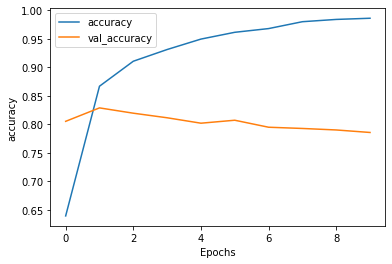

In [ ]:
create_plot(history_gru,"accuracy")

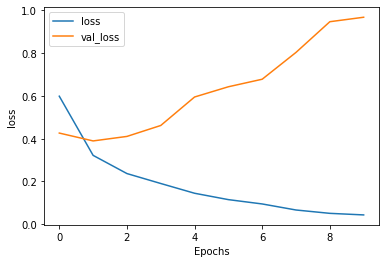

In [ ]:
create_plot(history_gru,"loss")

CONVOLUTION MODEL

In [ ]:
#PARAMETERS
embedding4=16
filters=28
kernel_size=5

model_conv= tf.keras.Sequential([
                                 tf.keras.layers.Embedding(vocab_size, embedding4, input_length=max_length),
                                 tf.keras.layers.Conv1D(filters,kernel_size, activation="relu"),
                                 tf.keras.layers.GlobalAveragePooling1D(),
                                 tf.keras.layers.Dense(6, activation="relu"),
                                 tf.keras.layers.Dense(1, activation="sigmoid")])
model_conv.compile(loss="binary_crossentropy",
                   optimizer="adam",
                   metrics=["accuracy"])

model_conv.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 28)           2268      
                                                                 
 global_average_pooling1d (G  (None, 28)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_8 (Dense)             (None, 6)                 174       
                                                                 
 dense_9 (Dense)             (None, 1)                 7         
                                                                 
Total params: 162,449
Trainable params: 162,449
Non-trainable params: 0
________________________________________________

In [ ]:
history_conv=model_conv.fit(padded,train_labels_final, batch_size=128, epochs=10, validation_data=(test_padded, test_labels_final))

Epoch 1/10
196/196 [==============================] - 6s 25ms/step - loss: 0.5672 - accuracy: 0.7013 - val_loss: 0.4037 - val_accuracy: 0.8212
Epoch 2/10
196/196 [==============================] - 5s 24ms/step - loss: 0.3192 - accuracy: 0.8662 - val_loss: 0.3899 - val_accuracy: 0.8260
Epoch 3/10
196/196 [==============================] - 5s 24ms/step - loss: 0.2521 - accuracy: 0.9010 - val_loss: 0.3950 - val_accuracy: 0.8286
Epoch 4/10
196/196 [==============================] - 5s 24ms/step - loss: 0.2162 - accuracy: 0.9201 - val_loss: 0.4319 - val_accuracy: 0.8221
Epoch 5/10
196/196 [==============================] - 5s 24ms/step - loss: 0.1901 - accuracy: 0.9298 - val_loss: 0.4956 - val_accuracy: 0.8097
Epoch 6/10
196/196 [==============================] - 5s 25ms/step - loss: 0.1710 - accuracy: 0.9400 - val_loss: 0.5066 - val_accuracy: 0.8135
Epoch 7/10
196/196 [==============================] - 5s 24ms/step - loss: 0.1527 - accuracy: 0.9469 - val_loss: 0.5549 - val_accuracy: 0.8070

In [ ]:
create_plot(history_conv,"accuracy")

In [ ]:
create_plot(history_conv,"loss")